In [1]:
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.optimizers import RMSprop,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [2]:
import matplotlib.pyplot as plt

In [3]:
# import required packages
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [4]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        r'C:\Users\Ankit\Downloads\project folder\data\train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')
print(train_generator)

Found 21040 images belonging to 4 classes.


In [5]:

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        r'C:\Users\Ankit\Downloads\project folder\data\test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 5385 images belonging to 4 classes.


In [6]:
# create model structure
emotion_model = Sequential()

emotion_model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
emotion_model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.40))

emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.40))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(4, activation='softmax'))
cv2.ocl.setUseOpenCL(False)


In [7]:




checkpoint = ModelCheckpoint(
                             'emotionModelf_.h5',
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

earlystop = EarlyStopping(
                          monitor='val_loss',
                          min_delta=0,
                          patience=25,
                          verbose=1,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.0001)

callbacks = [earlystop,checkpoint,learning_rate_reduction]

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])


# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=21040 // 64,
        epochs=50,callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=5385 // 64)

# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotionModelf.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
#emotion_model.save_weights('emotion_detect_model.h5')



C:\Users\Ankit\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\Ankit\AppData\Local\Temp\ipykernel_15220\193466374.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 1.3832 - accuracy: 0.2716
Epoch 1: val_accuracy improved from -inf to 0.37742, saving model to emotionModelf_.h5
328/328 [==============================] - 140s 409ms/step - loss: 1.3832 - accuracy: 0.2716 - val_loss: 1.3738 - val_accuracy: 0.3774 - lr: 1.0000e-04
Epoch 2/50
327/328 [============================>.] - ETA: 0s - loss: 1.3277 - accuracy: 0.3661
Epoch 2: val_accuracy improved from 0.37742 to 0.46633, saving model to emotionModelf_.h5
328/328 [==============================] - 8s 22ms/step - loss: 1.3274 - accuracy: 0.3664 - val_loss: 1.2406 - val_accuracy: 0.4663 - lr: 1.0000e-04
Epoch 3/50
327/328 [============================>.] - ETA: 0s - loss: 1.2369 - accuracy: 0.4457
Epoch 3: val_accuracy improved from 0.46633 to 0.50428, saving model to emotionModelf_.h5
328/328 [==============================] - 7s 22ms/step - loss: 1.2368 - accuracy: 0.4458 - val_loss: 1.1566 - val_accuracy: 0.5043 - lr: 1.0000

328/328 [==============================] - 7s 22ms/step - loss: 0.7765 - accuracy: 0.6873 - val_loss: 0.7550 - val_accuracy: 0.6944 - lr: 1.0000e-04
Epoch 26/50
328/328 [==============================] - ETA: 0s - loss: 0.7701 - accuracy: 0.6892
Epoch 26: val_accuracy did not improve from 0.69438
328/328 [==============================] - 7s 22ms/step - loss: 0.7701 - accuracy: 0.6892 - val_loss: 0.7576 - val_accuracy: 0.6916 - lr: 1.0000e-04
Epoch 27/50
327/328 [============================>.] - ETA: 0s - loss: 0.7591 - accuracy: 0.6913
Epoch 27: val_accuracy improved from 0.69438 to 0.70964, saving model to emotionModelf_.h5
328/328 [==============================] - 7s 22ms/step - loss: 0.7593 - accuracy: 0.6912 - val_loss: 0.7275 - val_accuracy: 0.7096 - lr: 1.0000e-04
Epoch 28/50
328/328 [==============================] - ETA: 0s - loss: 0.7536 - accuracy: 0.6958
Epoch 28: val_accuracy improved from 0.70964 to 0.70982, saving model to emotionModelf_.h5
328/328 [===================

In [8]:
hist=emotion_model_info.history

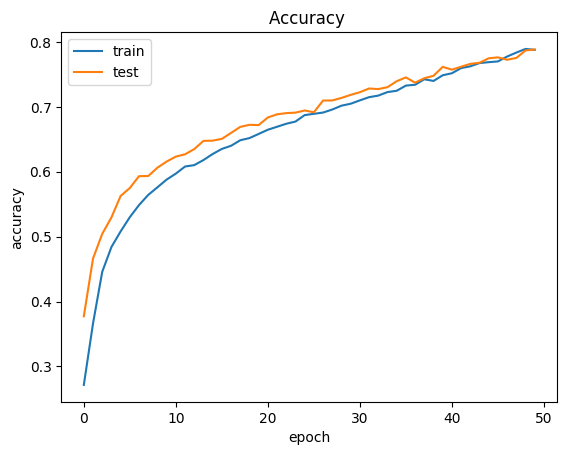

In [9]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy ")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.savefig("Accuracy_plotf.png")

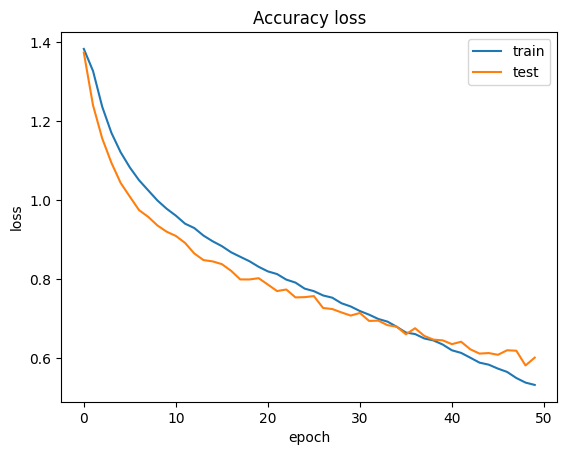

In [10]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("Accuracy_lossf.png")
     